In [1]:
w2v_filepath = "/data/jugs/nlu/GoogleNews-vectors-negative300.bin"

In [2]:
import gensim
from sklearn.preprocessing import normalize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format(w2v_filepath, binary=True)

In [36]:
tokens = ['dog','cat','lion','tiger','football','basketball', 'coffee', 'burger']

In [37]:
tok_len = len(tokens)
token_embed = np.zeros((tok_len, 300), dtype=float)
for i,val in enumerate(tokens):
    print(i , val)
#     print(token_embed[i])
    token_embed[i] = model[val]

0 dog
1 cat
2 lion
3 tiger
4 football
5 basketball
6 coffee
7 burger


In [38]:
token_embed

array([[ 0.05126953, -0.02233887, -0.17285156, ...,  0.41601562,
        -0.35546875,  0.22265625],
       [ 0.0123291 ,  0.20410156, -0.28515625, ...,  0.4921875 ,
        -0.27539062,  0.05615234],
       [ 0.21289062, -0.00457764, -0.23632812, ..., -0.13867188,
        -0.19921875,  0.17675781],
       ...,
       [-0.00854492,  0.08447266,  0.21289062, ...,  0.22167969,
         0.04663086,  0.25976562],
       [-0.16113281, -0.13671875, -0.37304688, ...,  0.06591797,
         0.21777344,  0.20214844],
       [-0.26757812,  0.05224609,  0.00915527, ...,  0.03955078,
        -0.14941406,  0.09130859]])

In [39]:
for i, val in enumerate(token_embed):
    norm1 = val / np.linalg.norm(val)
    token_embed[i] = norm1
# norm2 = normalize(token_embed[:,np.newaxis], axis=0).ravel()
# print( np.all(norm1 == norm2))


In [40]:
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      annot=True,  
      cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

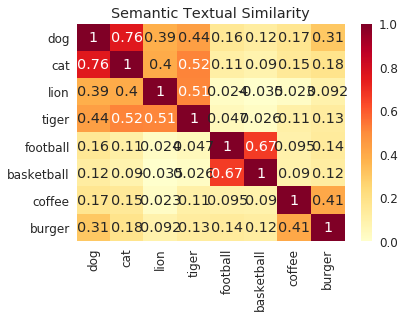

In [41]:
plot_similarity(tokens, token_embed , 90)

In [18]:
# Loading Tencent Word2Vec embedding

tencent_zh_w2v = '/home/maybe/tencentWordEmbedding/Tencent_AILab_ChineseEmbedding.txt'

In [24]:
from gensim.models import KeyedVectors

model_zh = KeyedVectors.load_word2vec_format(tencent_zh_w2v, binary=False)

In [22]:
zh_tokens = ['猫', '狗','狮子','老虎','篮球','足球','咖啡','汉堡包']

In [34]:
zh_tok_len = len(zh_tokens)
zh_token_embed = np.zeros((zh_tok_len, 200), dtype='float')
for i, val in enumerate(zh_tokens):
#     print(i, val)
    embed = model_zh[val]
    norm1 = embed / np.linalg.norm(embed)
    zh_token_embed[i] = norm1
    

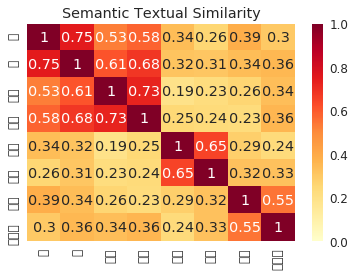

In [35]:
plot_similarity(zh_tokens, zh_token_embed , 90)